In [59]:
pip install pandas pyreadstat

In [60]:
import pandas as pd

# Load the .XPT file using pandas
file_path = "LLCP2023.XPT"
df = pd.read_sas(file_path, format='xport', encoding='windows-1252')

# Check the shape and first few rows
print(df.shape)
df.head()


(433323, 350)


,_STATE,FMONTH,IDATE,IMONTH,IDAY,IYEAR,DISPCODE,SEQNO,_PSU,CTELENM1,...,DROCDY4_,_RFBING6,_DRNKWK2,_RFDRHV8,_FLSHOT7,_PNEUMO3,_AIDTST4,_RFSEAT2,_RFSEAT3,_DRNKDRV
0,1.0,1.0,03012023,03,01,2023,1100.0,2023000001,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,2.0,2.0,2.0,1.0,1.0,9.0
1,1.0,1.0,01062023,01,06,2023,1100.0,2023000002,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
2,1.0,1.0,03082023,03,08,2023,1100.0,2023000003,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,2.0,1.0,1.0,9.0
3,1.0,1.0,03062023,03,06,2023,1100.0,2023000004,2.023000e+09,1.0,...,5.397605e-79,1.0,5.397605e-79,1.0,1.0,1.0,1.0,1.0,1.0,9.0
4,1.0,1.0,01062023,01,06,2023,1100.0,2023000005,2.023000e+09,1.0,...,7.000000e+00,1.0,4.700000e+01,1.0,2.0,1.0,2.0,1.0,1.0,2.0


In [61]:
[col for col in df.columns if 'AGE' in col.upper()]

['DIABAGE4', 'CNCRAGE', 'CAGEG', '_AGEG5YR', '_AGE65YR', '_AGE80', '_AGE_G']

In [62]:
# Filter for Gen Z: ages 18–28
genz_df = df[(df['_AGE80'] >= 18) & (df['_AGE80'] <= 28)]
print("Gen Z sample size:", genz_df.shape)


Gen Z sample size: (43311, 350)


In [63]:
# Define the specific columns we want to extract from the Gen Z dataset.
# These include demographic, health behavior, and mental health indicators.
columns_of_interest = [
    '_AGE80',        # Age top-coded at 80+
    'GENHLTH',       # General health rating
    'EXERANY2',      # Any physical activity in past 30 days
    'SMOKE100',      # Has smoked at least 100 cigarettes
    '_RFSMOK3',      # Smoker risk factor (recode)
    'DRNKANY6',      # Had at least one alcoholic drink in past 30 days
    'DRNK3GE5',      # Binge drinking (5+ drinks on one occasion)
    'MAXDRNKS',      # Maximum number of drinks on any occasion
    '_DRNKWK2',      # Average drinks per week
    '_DRNKDRV',      # Drank and drove
    'MENTHLTH',      # Number of days mental health was not good
    '_MENT14D'       # Mental health risk flag (14+ days)
]

# Create a new DataFrame with only the selected columns
genz_health = genz_df[columns_of_interest]

# Display the first few rows of the filtered dataset for quick inspection
genz_health.head()

,_AGE80,GENHLTH,EXERANY2,SMOKE100,_RFSMOK3,DRNKANY6,DRNK3GE5,MAXDRNKS,_DRNKWK2,_DRNKDRV,MENTHLTH,_MENT14D
203,19.0,2.0,1.0,2.0,1.0,2.0,NaN,NaN,5.397605e-79,9.0,4.0,2.0
309,24.0,2.0,1.0,2.0,1.0,1.0,88.0,2.0,3.000000e+02,2.0,5.0,2.0
966,23.0,2.0,1.0,2.0,1.0,1.0,88.0,2.0,1.400000e+02,2.0,10.0,2.0
967,23.0,4.0,1.0,2.0,1.0,1.0,88.0,1.0,4.700000e+01,2.0,10.0,2.0
973,28.0,3.0,2.0,1.0,2.0,1.0,3.0,10.0,5.833000e+03,1.0,6.0,2.0


In [64]:
# Calculate the percentage distribution of drinking responses
# 'DRNKANY6' indicates whether the respondent had at least one alcoholic drink in the past 30 days.
# `value_counts(normalize=True)` gives proportions (relative frequency).
# Multiplying by 100 converts it to percentages.
drinking_rate = genz_health['DRNKANY6'].value_counts(normalize=True) * 100

# Print the percentage of each response category
# Typical codes: 1 = Yes, 2 = No, 7/9 = Don't know/refused/missing
print(drinking_rate)

DRNKANY6
1.0    52.411628
2.0    40.710212
9.0     6.217820
7.0     0.660340
Name: proportion, dtype: float64


In [65]:
# Drop or filter out codes above 30
genz_health_clean = genz_health[genz_health['MENTHLTH'] <= 30]

# Recalculate stats
genz_health_clean['MENTHLTH'].describe()

count    26784.000000
mean        11.099985
std          9.352434
min          1.000000
25%          3.000000
50%          7.000000
75%         15.000000
max         30.000000
Name: MENTHLTH, dtype: float64

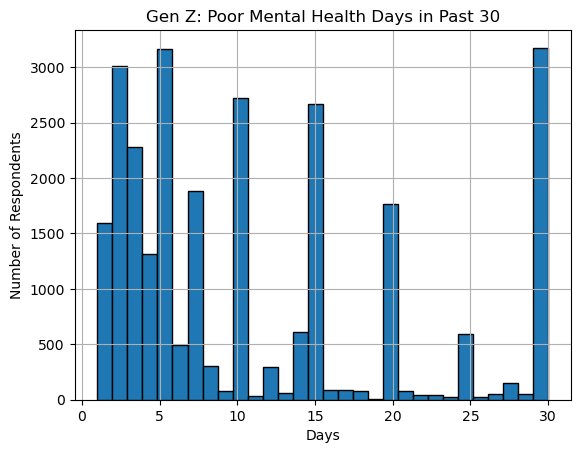

In [66]:
# Visualize Mental Health Days
import matplotlib.pyplot as plt

plt.hist(genz_health_clean['MENTHLTH'], bins=30, edgecolor='black')
plt.title("Gen Z: Poor Mental Health Days in Past 30")
plt.xlabel("Days")
plt.ylabel("Number of Respondents")
plt.grid(True)
plt.show()

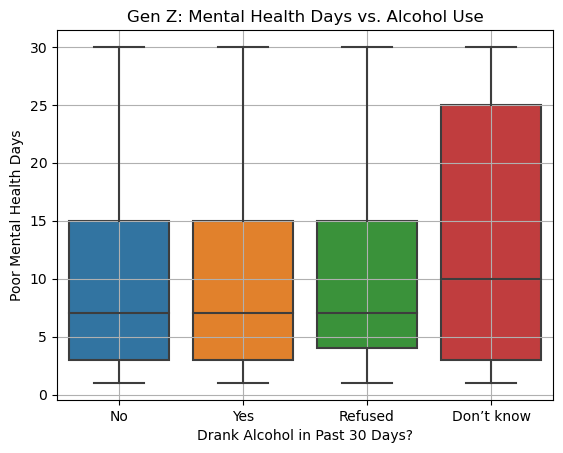

In [67]:
import seaborn as sns
import matplotlib.pyplot as plt

# Step 1: Make a clean copy and map labels safely
drink_map = {1.0: 'Yes', 2.0: 'No', 7.0: 'Don’t know', 9.0: 'Refused'}
genz_health_clean = genz_health_clean.copy()
genz_health_clean['DRNKANY6_LABEL'] = genz_health_clean['DRNKANY6'].map(drink_map)

# Step 2: Boxplot: Mental Health vs. Alcohol Use
sns.boxplot(data=genz_health_clean, x='DRNKANY6_LABEL', y='MENTHLTH')
plt.title("Gen Z: Mental Health Days vs. Alcohol Use")
plt.xlabel("Drank Alcohol in Past 30 Days?")
plt.ylabel("Poor Mental Health Days")
plt.grid(True)
plt.show()


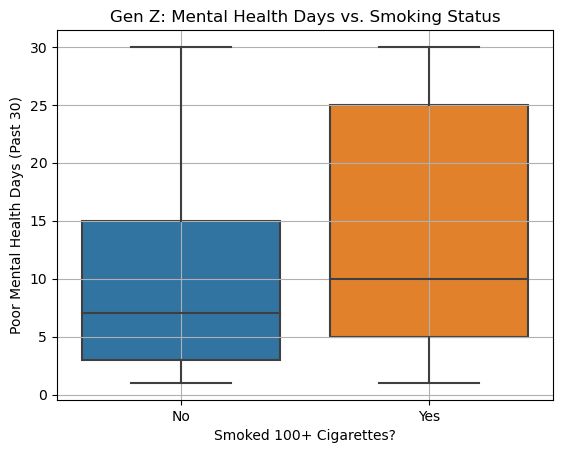

In [68]:
# Compare Smokers vs. Mental Health
# Map smoking status
smoke_map = {1.0: 'Yes', 2.0: 'No', 7.0: 'Don’t know', 9.0: 'Refused'}
genz_health_clean['SMOKE100_LABEL'] = genz_health_clean['SMOKE100'].map(smoke_map)

# Optional: Filter to just Yes/No
smoke_df = genz_health_clean[genz_health_clean['SMOKE100_LABEL'].isin(['Yes', 'No'])]

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=smoke_df, x='SMOKE100_LABEL', y='MENTHLTH')
plt.title("Gen Z: Mental Health Days vs. Smoking Status")
plt.xlabel("Smoked 100+ Cigarettes?")
plt.ylabel("Poor Mental Health Days (Past 30)")
plt.grid(True)
plt.show()

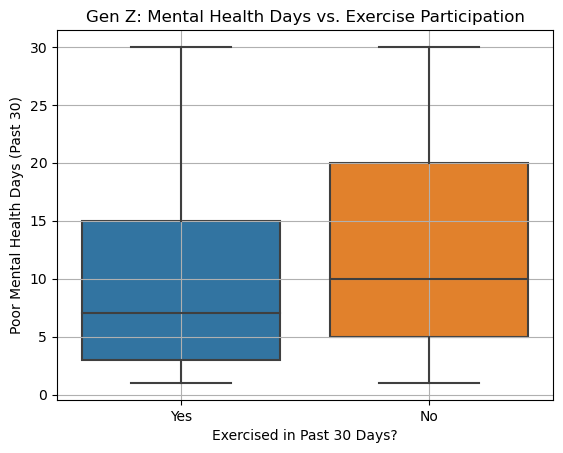

In [69]:
# Visualize Exercise vs. Stress
# Map exercise participation
exercise_map = {1.0: 'Yes', 2.0: 'No', 7.0: 'Don’t know', 9.0: 'Refused'}
genz_health_clean['EXERANY2_LABEL'] = genz_health_clean['EXERANY2'].map(exercise_map)

# Filter valid responses
exercise_df = genz_health_clean[genz_health_clean['EXERANY2_LABEL'].isin(['Yes', 'No'])]

# Boxplot
sns.boxplot(data=exercise_df, x='EXERANY2_LABEL', y='MENTHLTH')
plt.title("Gen Z: Mental Health Days vs. Exercise Participation")
plt.xlabel("Exercised in Past 30 Days?")
plt.ylabel("Poor Mental Health Days (Past 30)")
plt.grid(True)
plt.show()

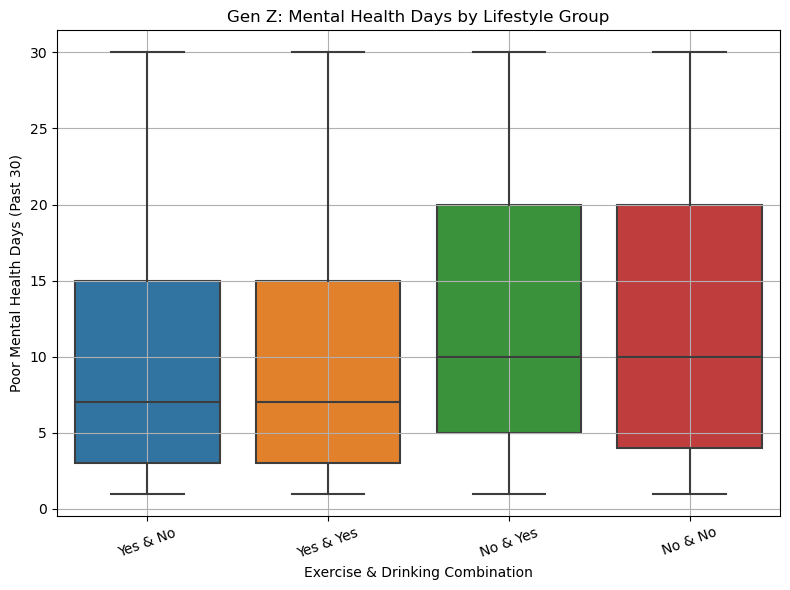

In [70]:
# Bivariate Analysis – Exercise + Drinking vs. Mental Health
# Recode drinking and exercise into Yes/No
genz_health_clean['DRNKANY6_LABEL'] = genz_health_clean['DRNKANY6'].map({1.0: 'Yes', 2.0: 'No'})
genz_health_clean['EXERANY2_LABEL'] = genz_health_clean['EXERANY2'].map({1.0: 'Yes', 2.0: 'No'})

# Filter only valid combinations
combo_df = genz_health_clean.dropna(subset=['DRNKANY6_LABEL', 'EXERANY2_LABEL', 'MENTHLTH'])

# Create combo label
combo_df = combo_df.copy()
combo_df['LIFESTYLE_GROUP'] = combo_df['EXERANY2_LABEL'] + " & " + combo_df['DRNKANY6_LABEL']

# Plot
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(8,6))
sns.boxplot(data=combo_df, x='LIFESTYLE_GROUP', y='MENTHLTH')
plt.title("Gen Z: Mental Health Days by Lifestyle Group")
plt.xlabel("Exercise & Drinking Combination")
plt.ylabel("Poor Mental Health Days (Past 30)")
plt.grid(True)
plt.xticks(rotation=20)
plt.tight_layout()
plt.show()

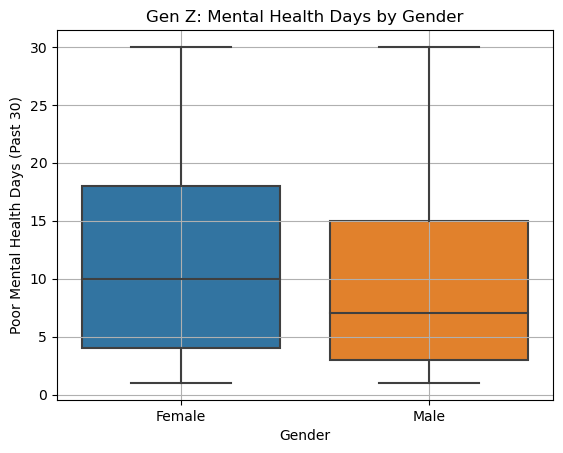

In [71]:
# Add BMI, Gender, or Sleep to the Analysis
# Gender vs. Mental Health
# Map gender values
gender_map = {1.0: 'Male', 2.0: 'Female'}
genz_health_clean['GENDER'] = genz_df['SEXVAR'].map(gender_map)

# Drop missing values for clean plotting
gender_df = genz_health_clean.dropna(subset=['GENDER', 'MENTHLTH'])

# Boxplot
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(data=gender_df, x='GENDER', y='MENTHLTH')
plt.title("Gen Z: Mental Health Days by Gender")
plt.xlabel("Gender")
plt.ylabel("Poor Mental Health Days (Past 30)")
plt.grid(True)
plt.show()

In [72]:
# Normalize BMI
genz_health_clean['BMI'] = genz_df['_BMI5'] / 100

# Drop missing values
bmi_df = genz_health_clean.dropna(subset=['BMI', 'MENTHLTH'])

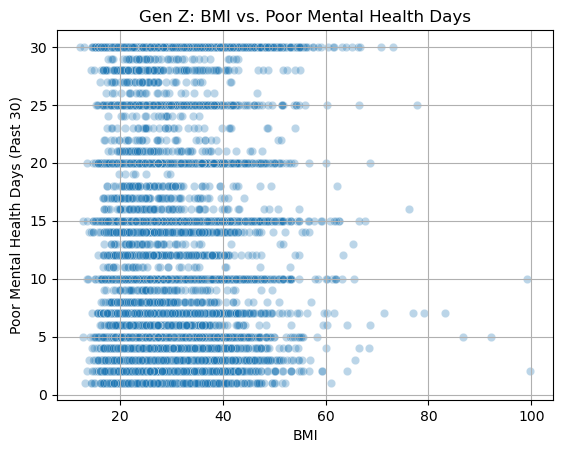

In [73]:
# Visualize BMI vs. Mental Health
import seaborn as sns
import matplotlib.pyplot as plt

sns.scatterplot(data=bmi_df, x='BMI', y='MENTHLTH', alpha=0.3)
plt.title("Gen Z: BMI vs. Poor Mental Health Days")
plt.xlabel("BMI")
plt.ylabel("Poor Mental Health Days (Past 30)")
plt.grid(True)
plt.show()

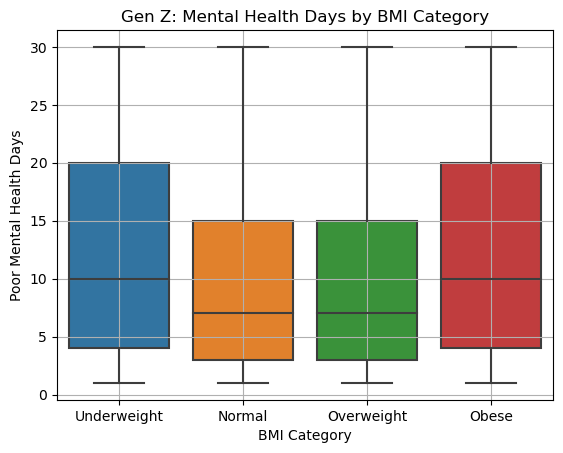

In [74]:
# Group BMI into Categories
def bmi_category(bmi):
    if pd.isna(bmi):
        return None
    elif bmi < 18.5:
        return 'Underweight'
    elif bmi < 25:
        return 'Normal'
    elif bmi < 30:
        return 'Overweight'
    else:
        return 'Obese'

bmi_df = bmi_df.copy()
bmi_df['BMI_CATEGORY'] = bmi_df['BMI'].apply(bmi_category)

sns.boxplot(data=bmi_df, x='BMI_CATEGORY', y='MENTHLTH', order=['Underweight', 'Normal', 'Overweight', 'Obese'])
plt.title("Gen Z: Mental Health Days by BMI Category")
plt.xlabel("BMI Category")
plt.ylabel("Poor Mental Health Days")
plt.grid(True)
plt.show()

# Statistical Tests

In [75]:
pip install scipy statsmodels scikit-learn

Note: you may need to restart the kernel to use updated packages.


In [76]:
# T-Test – Gender vs. Mental Health
from scipy.stats import ttest_ind

# Clean gender data
gender_df = genz_health_clean.dropna(subset=['GENDER', 'MENTHLTH'])

# Separate groups
male = gender_df[gender_df['GENDER'] == 'Male']['MENTHLTH']
female = gender_df[gender_df['GENDER'] == 'Female']['MENTHLTH']

# Run independent t-test
t_stat, p_val = ttest_ind(male, female)
print(f"T-statistic: {t_stat:.3f}, P-value: {p_val:.5f}")

T-statistic: -14.628, P-value: 0.00000


In [77]:
# Correlation – BMI vs. Mental Health
from scipy.stats import spearmanr

# Clean BMI data
bmi_corr_df = genz_health_clean.dropna(subset=['BMI', 'MENTHLTH'])

# Spearman correlation
corr, p = spearmanr(bmi_corr_df['BMI'], bmi_corr_df['MENTHLTH'])
print(f"Spearman Correlation: {corr:.3f}, P-value: {p:.5f}")

Spearman Correlation: 0.066, P-value: 0.00000


In [78]:
# Chi-square – Smoking vs. Drinking
from scipy.stats import chi2_contingency
import pandas as pd

# Create contingency table
smoke_drink = pd.crosstab(genz_health_clean['SMOKE100'], genz_health_clean['DRNKANY6'])

# Chi-square test
chi2, p, dof, ex = chi2_contingency(smoke_drink)
print(f"Chi-square: {chi2:.3f}, P-value: {p:.5f}")

Chi-square: 601.999, P-value: 0.00000


# Regression Modeling 

In [79]:
# Map Binary Categorical Columns (Exercise, Smoking, Drinking)
# Valid mapping
yes_no_map = {1.0: 'Yes', 2.0: 'No'}

# Apply mapping
genz_health_clean['EXERCISE'] = genz_health_clean['EXERANY2'].map(yes_no_map)
genz_health_clean['SMOKER'] = genz_health_clean['SMOKE100'].map(yes_no_map)
genz_health_clean['DRINKER'] = genz_health_clean['DRNKANY6'].map(yes_no_map)

In [80]:
model_df = genz_health_clean.dropna(
    subset=['_MENT14D', 'MENTHLTH', 'GENDER', 'EXERCISE', 'SMOKER', 'DRINKER', 'BMI']
)
print("Model-ready rows:", model_df.shape[0])

Model-ready rows: 23806


In [81]:
# Logistic Regression – Predicting 14+ Poor Mental Health Days
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

# Step 1: One-hot encode categorical variables
X = pd.get_dummies(model_df[['GENDER', 'EXERCISE', 'SMOKER', 'DRINKER', 'BMI']], drop_first=True)
y = model_df['_MENT14D']

# Step 2: Split data
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Step 3: Fit logistic regression
logreg = LogisticRegression(max_iter=1000)
logreg.fit(X_train, y_train)

# Step 4: Evaluate
y_pred = logreg.predict(X_test)
print("Classification Report:\n", classification_report(y_test, y_pred))
print("Confusion Matrix:\n", confusion_matrix(y_test, y_pred))

Classification Report:
               precision    recall  f1-score   support

         2.0       0.68      0.94      0.79      3137
         3.0       0.55      0.14      0.23      1625

    accuracy                           0.67      4762
   macro avg       0.62      0.54      0.51      4762
weighted avg       0.64      0.67      0.60      4762

Confusion Matrix:
 [[2947  190]
 [1391  234]]


In [82]:
# Linear Regression – Predicting Mental Health Days
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score

# Target: MENTHLTH (0–30 days)
y_reg = model_df['MENTHLTH']

# Reuse same features (X)
X_train_r, X_test_r, y_train_r, y_test_r = train_test_split(X, y_reg, test_size=0.2, random_state=42)

# Fit linear regression
linreg = LinearRegression()
linreg.fit(X_train_r, y_train_r)

# Predict and evaluate
y_pred_r = linreg.predict(X_test_r)
print("RMSE:", mean_squared_error(y_test_r, y_pred_r, squared=False))
print("R² Score:", r2_score(y_test_r, y_pred_r))

# Optional: Show coefficients
coef_df = pd.DataFrame({'Feature': X.columns, 'Coefficient': linreg.coef_})
print(coef_df)

RMSE: 9.100804884109285
R² Score: 0.04398461700288292
        Feature  Coefficient
0           BMI     0.108875
1   GENDER_Male    -2.004837
2  EXERCISE_Yes    -2.018149
3    SMOKER_Yes     3.876623
4   DRINKER_Yes    -0.343389


In [83]:
# Export the cleaned Gen Z health DataFrame to a CSV file for use in Streamlit or further analysis.
# The 'index=False' option ensures that the DataFrame index is not included as a separate column in the file.
genz_health_clean.to_csv("GenZ_Health_Insights_BRFFS2023.csv", index=False)